In [105]:
###Modules used
#openweathermapy.core
#pandas
#matplotlib
#numpy
#datetime
#json
#requests

###API's used (API keys used for google as well as openweather)
# "https://maps.googleapis.com/maps/api/geocode/json"
# "https://maps.googleapis.com/maps/api/place/nearbysearch/json?"
# "https://maps.googleapis.com/maps/api/place/findplacefromtext/json?"
#Instead of openweathermapy API, wrapper is 

#Additional APIs that could be used
#https://maps.googleapis.com/maps/api/place/details/json?
#https://maps.googleapis.com/maps/api/distancematrix/json?

In [106]:
import requests
import json
import datetime

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import openweathermapy.core as owm

from config import api_key
from config import gkey

In [107]:
#Read all the Weather csv files 
main = "Resources/Indoor_Outdoor_Weather - main.csv"
main_df = pd.read_csv(main, encoding="ISO-8859-1")
Atmosphere = "Resources/Indoor_Outdoor_Weather - Atmosphere.csv"
atmosphere_df = pd.read_csv(Atmosphere, encoding="ISO-8859-1")
Drizzle= "Resources/Indoor_Outdoor_Weather - Drizzle.csv"
drizzle_df = pd.read_csv(Drizzle, encoding="ISO-8859-1")
Rain = "Resources/Indoor_Outdoor_Weather - Rain.csv"
rain_df = pd.read_csv(Rain, encoding="ISO-8859-1")
Snow ="Resources/Indoor_Outdoor_Weather - Snow.csv"
snow_df = pd.read_csv(Snow, encoding="ISO-8859-1")

#https://developers.google.com/places/web-service/supported_types
#Read all the activities files
Acty_In = pd.read_excel("Resources/Indoor.xlsx")
Acty_Out = pd.read_excel("Resources/Outdoor.xlsx")
Acty_EveIn = pd.read_excel("Resources/EveIndoor.xlsx")
Acty_EveInOut = pd.read_excel("Resources/EveInOut.xlsx")
Acty_NightIn = pd.read_excel("Resources/NightIndoor.xlsx")
Acty_NightInOut = pd.read_excel("Resources/NightInOut.xlsx")

In [108]:
#Converting the actvity dataframes into list
Acty_Inlist = Acty_In["Indoor"].tolist()
Acty_Outlist = Acty_Out["Outdoor"].tolist()
Acty_EveInlist = Acty_EveIn["EveIndoor"].tolist()
Acty_EveInOutlist = Acty_EveInOut["EveInOut"].tolist()
Acty_NightInlist = Acty_NightIn["NightIndoor"].tolist()
Acty_NightInOutlist = Acty_NightInOut["NightInOut"].tolist()

In [109]:
#Input the target city and state
Target_City = input("Enter city & state in the format 'city,state: ")

Enter city & state in the format 'city,state: Sayreville,NJ


In [110]:
#Split the input to get the city
City = Target_City.split(",")[0]

#Create settings dictionary for units & appid
settings = {"units": "metric", "appid": api_key}

In [111]:
#Get current weather
current_weather = owm.get_current(City, **settings)

summary = ["name", 'weather', "main", "wind", 'clouds']
data = current_weather(*summary)

currentmain = data[1][0]["main"]
temp = data[2]['temp']
humidity = data[2]['humidity']
windspeed = data[3]["speed"]
currentdesc = data[1][0]['description']

In [112]:
Finalresult = ""
Words_of_advice = " "
 
# loop through main weather types to determine if outdoor or indoor activities
if (currentmain=="Thunderstorms") or (currentmain=="Clouds") or (currentmain=="Clear") or (currentmain=="Mist"):
    if (currentmain=="Thunderstorms"):
        Words_of_advice = "Staysafe!!! "+ currentmain + " in the " + City
        Finalresult="indoor"
        print(f'{Words_of_advice}: Be {Finalresult}')
    else:
        Finalresult="outdoor"
        print(f'Lets evaluate temp, windspeed and humidity further to confirm if we should be {Finalresult}s')
else:
    if currentmain=="Rain":
    #read rain.df to find further details
        for index, desctype in rain_df.iterrows():
            if currentdesc == desctype["Description"]:
                Finalresult=rain_df["Rating"][index]
                print(f'{currentmain}:{currentdesc}: You can be {Finalresult}')
    elif currentmain=="Snow" :
        #read snow.df to find further details
        for index, desctype in snow_df.iterrows():
            if currentdesc == desctype["Description"]:
                Finalresult=desctype["Rating"][index]
                print(f'{currentmain}:{currentdesc}: You can be {Finalresult}')
    elif currentmain=="Drizzle" :
        #read drizzledf to find further details
        for index, desctype in drizzle_df.iterrrows():
            if currentdesc == desctype["Description"]:
                Finalresult=drizzle_df["Rating"][index]
                print(f'{currentmain}:{currentdesc}: You can be {Finalresult}')
    elif currentmain=="Atmosphere" :
        #read atmospheredf to find further details
        for index, desctype in atmosphere_df.iterrows():
            if currentdesc== desctype["Description"]:
                Finalresult=atmosphere_df["Rating"][index]
                print(f'{currentmain}:{currentdesc}: You can be {Finalresult}')
if Finalresult == "outdoor" or " ":
    if  (temp<7 or temp>35):
        Words_of_advice = "Better to be safe inside as it is extreme temperature" + str(temp) + " outside in " + City
        Finalresult="indoor"
        print(f'{Words_of_advice}: Advisable to be {Finalresult}')
    elif(windspeed>38):
        #https://en.wikipedia.org/wiki/Beaufort_scale
        Words_of_advice = "Better to be safe inside as it is windy " + str(windspeed) + " outside in " + City
        Finalresult="indoor"
        print(f'{Words_of_advice}: Advisable to be {Finalresult}')
    elif(humidity>60): 
        Words_of_advice  = "Better to be inside as it is quite humid " + str(humidity) + " outside in " + City
        Finalresult="indoor" 
        print(f'{Words_of_advice}: Advisable to be {Finalresult}')
    else:
        Words_of_advice = "It is safe & pleasant!!! Enjoy outside in the current weather of "+ currentmain +" in "+ City
        Finalresult="outdoor"
        print(f'{Words_of_advice}: Be {Finalresult}s & have fun!!!')

Lets evaluate temp, windspeed and humidity further to confirm if we should be outdoors
It is safe & pleasant!!! Enjoy outside in the current weather of Clear in Sayreville: Be outdoors & have fun!!!


In [113]:
now = datetime.datetime.now()
print(now)
At12= now.replace(hour=12, minute=0, second=0, microsecond=0)
At15 = now.replace(hour=15, minute=0, second=0, microsecond=0)
At18 = now.replace(hour=18, minute=0, second=0, microsecond=0)
At21 = now.replace(hour=21, minute=0, second=0, microsecond=0)

2018-07-06 21:12:31.505586


In [114]:
Acty = Finalresult
if (Acty == "outdoor"):
    if(now < At12):
        print(Words_of_advice)
        print("It's morning, plan outdoor activities for the entire day")
        Acty = Acty_Outlist
    elif((now >= At12 and now < At15)):
        print(Words_of_advice)
        print("It's afternoon, plan outdoor activities for the day")
        Acty = Acty_Outlist
    elif((now >= At15 and now < At18)):
        print(Words_of_advice)
        print("It's evening, though you can go outdoor,however, we would suggest indoor activities for the evening as parks,zoos might be closed. We would add stadiums though, as there might be matches and campgrounds if you are adventurous!!!")
        Acty = Acty_EveInOutlist
    elif((now >= At18)):
        print(Words_of_advice)
        print("It's lovely night, though you can go outdoor,however, we would recommend indoor activities for the night,as parks,zoos are closed. We would add stadiums though, as there might be matches and campgrounds if you are adventurous!!!")
        Acty = Acty_NightInOutlist 
elif (Acty == "indoor"):        
    if(now < At12):
        print(Words_of_advice)
        print("It's morning, plan indoor activities for the entire day or stay at home & relax.")
        Acty = Acty_Inlist
    elif((now >= At12 and now < At15)):
        print(Words_of_advice)
        print("It's afternoon, plan indoor activities for the day or stay at home & relax.")
        Acty = Acty_Inlist
    elif((now >= At15 and now < At18)):
        print(Words_of_advice)
        print("It's evening, plan indoor activities for the evening or stay at home & relax.")
        Acty = Acty_EveInlist 
    elif((now >= At18)):
        print(Words_of_advice)
        print("It's night, plan indoor activities for the night or stay at home & relax.")
        Acty = Acty_NightInlist 

It is safe & pleasant!!! Enjoy outside in the current weather of Clear in Sayreville
It's lovely night, though you can go outdoor,however, we would recommend indoor activities for the night,as parks,zoos are closed. We would add stadiums though, as there might be matches and campgrounds if you are adventurous!!!


In [115]:
#Google Maps Geocode API
base_url_geocode = "https://maps.googleapis.com/maps/api/geocode/json"

#Creating the params dict with address and key
params_geocode = {"address": Target_City, "key": gkey}

In [116]:
# Run request (Build URL using the base_url & params)
response = requests.get(base_url_geocode, params=params_geocode)

# Convert the response to JSON
city_geo = response.json()

# Extract Lat/Lng
lat = city_geo["results"][0]["geometry"]["location"]["lat"]
lng = city_geo["results"][0]["geometry"]["location"]["lng"]

# Print results
print("%s: %s, %s" % (Target_City, lat, lng))

#Converting the lat & lng to string
lat = str(lat)
lng = str(lng)

Sayreville,NJ: 40.45940210000001, -74.360846


In [117]:
#Google maps nearby places search API
base_url_nearby = "https://maps.googleapis.com/maps/api/place/nearbysearch/json?"
#Google maps places API
base_url_findplace = "https://maps.googleapis.com/maps/api/place/findplacefromtext/json?"

In [124]:
#Find the names and addresses of nearbyplaces in given city,state entered by the
#user.
type_of_place = []
place_names = []
addresses = []
rating = []
openorclose = []
for i in range(len(Acty)):
    
    target_type = Acty[i]
    radius = 50000

# Build URL using the Google Maps API and other fields
    target_url_nearby = base_url_nearby+"key="+gkey+"&location="+lat+","+lng+"&radius="+str(radius)+"&type="+target_type
    #target_url_nearby = base_url_nearby+"key="+gkey+"&location="+lat+","+lng+"&rankby=distance"+"&type="+target_type

# Run request
    response = requests.get(target_url_nearby)
    city_placestogo = response.json()
   
    if city_placestogo["status"] == "ZERO_RESULTS":
        print(f'{Acty[i].upper()} : No {Acty[i]} near your place of choice.')
        type_of_place.append(target_type)
        place_names.append("")
        addresses.append("")
        rating.append("")
        openorclose.append("")
        print("\n")
    else:
        print(f'{Acty[i].upper()} : Bingo!!! We have found good {Acty[i]}s near your place of choice.')
        count = 0
        for item in city_placestogo["results"]:
            myplace = item["name"]
            myplace = myplace.replace(" ", "%20")
            target_url_findplace = base_url_findplace+"key="+gkey+"&input="+myplace+"&inputtype=textquery"+"&fields=formatted_address,name,rating,opening_hours"
            response = requests.get(target_url_findplace)
            data = response.json()
            type_of_place.append(target_type)
            try:
                place_names.append(data["candidates"][0]["name"])
            except:
                place_names.append(item["name"])
            try:    
                addresses.append(data["candidates"][0]["formatted_address"])
            except:
                addresses.append(item["vicinity"])
            try:    
                rating.append(data["candidates"][0]["rating"])
            except:   
                rating.append(np.nan)
            try:  
                if(data["candidates"][0]["opening_hours"]["open_now"]):
                    openorclose_status = "Open"
                else:
                    openorclose_status = "Closed"
                openorclose.append(openorclose_status)
            except:
                openorclose.append("Check the opening hours on the website")
            count = count + 1
        print(f'Total {count} {Acty[i]}s are found near {City}')
        print("\n")    

BAR : Bingo!!! We have found good bars near your place of choice.
Total 20 bars are found near Sayreville


CAMPGROUND : Bingo!!! We have found good campgrounds near your place of choice.
Total 20 campgrounds are found near Sayreville


CASINO : Bingo!!! We have found good casinos near your place of choice.
Total 19 casinos are found near Sayreville


LODGING : Bingo!!! We have found good lodgings near your place of choice.
Total 20 lodgings are found near Sayreville


MOVIE_RENTAL : Bingo!!! We have found good movie_rentals near your place of choice.
Total 20 movie_rentals are found near Sayreville


MOVIE_THEATER : Bingo!!! We have found good movie_theaters near your place of choice.
Total 20 movie_theaters are found near Sayreville


NIGHT_CLUB : Bingo!!! We have found good night_clubs near your place of choice.
Total 20 night_clubs are found near Sayreville


RESTAURANT : Bingo!!! We have found good restaurants near your place of choice.
Total 20 restaurants are found near Sayrevil

In [125]:
Df = pd.DataFrame({"Type":type_of_place,"Place":place_names,"Address":addresses, 
                   "Rating":rating,
                  "OpenorClose":openorclose})
Df.fillna(0, inplace=True)
Df[["Type","Place","Address","Rating","OpenorClose"]]

Type                                 Place  \
0           bar      The Madison Hotel Morristown, NJ   
1           bar                       The Peacock Inn   
2           bar                    Tick Tock Diner NY   
3           bar          The Court - A St Giles Hotel   
4           bar                      Sofitel New York   
5           bar                     Roger Smith Hotel   
6           bar                           ABC Kitchen   
7           bar                                Hudson   
8           bar                          Extra Virgin   
9           bar                      The Empire Hotel   
10          bar                       Flatiron Lounge   
11          bar                Loews Regency New York   
12          bar                      The Lowell Hotel   
13          bar                       The Mermaid Inn   
14          bar                       Battery Gardens   
15          bar                      Spot Dessert Bar   
16          bar                                 Manzo   
17          bar                       Texas Roadhouse   
18          bar                           Casa Mezcal   
19          bar                  Penthouse808 Rooftop   
20   campground                Liberty Harbor RV Park   
21   campground                     Turkey Swamp Park   
22   campground        William H Pouch Boy Scout Camp   
23   campground              Black Bear Lake Day Camp   
24   campground            TIP TAM CAMPING RESORT LLC   
25   campground      Indian Rock RV Park & Campground   
26   campground              Butterfly Camping Resort   
27   campground            Timberland Lake Campground   
28   campground                      Pine Cone Resort   
29   campground                       Camp Kinderland   
..          ...                                   ...   
149  restaurant                              Maialino   
150  restaurant                Loews Regency New York   
151  restaurant                      The Lowell Hotel   
152  restaurant                       The Mermaid Inn   
153  restaurant                       Battery Gardens   
154  restaurant                                 Manzo   
155  restaurant                        The Mark Hotel   
156  restaurant                          P.F. Chang's   
157  restaurant                       Texas Roadhouse   
158  restaurant                           Miss Lily's   
159     stadium                       MetLife Stadium   
160     stadium                        Red Bull Arena   
161     stadium           HighPoint Solutions Stadium   
162     stadium                 Madison Square Garden   
163     stadium                  CURE Insurance Arena   
164     stadium                     Msg Networks GmbH   
165     stadium                Newark Schools Stadium   
166     stadium               Rutgers Athletic Center   
167     stadium      Powers Field @ Princeton Stadium   
168     stadium            Meadowlands Sports Complex   
169     stadium                 Wall Stadium Speedway   
170     stadium  Centercourt Athletic Club of Chatham   
171     stadium        Stadium Entertainment Holdings   
172     stadium            Somerset Patriots Baseball   
173     stadium                     Arm & Hammer Park   
174     stadium                        Weaver Stadium   
175     stadium                            Ford Field   
176     stadium                         EVENTS MASTER   
177     stadium                    Sports Consultants   
178     stadium     Thomas M Gerrity Athletic Complex   

                                               Address  Rating  \
0              1 Convent Rd, Morristown, NJ 07960, USA     4.4   
1               20 Bayard Ln, Princeton, NJ 08540, USA     4.6   
2              481 Eighth Ave, New York, NY 10001, USA     3.6   
3               130 E 39th St, New York, NY 10016, USA     3.7   
4                45 W 44th St, New York, NY 10036, USA     4.4   
5           501 Lexington Ave, New York, NY 10017, USA     4.2   
6             

BAR


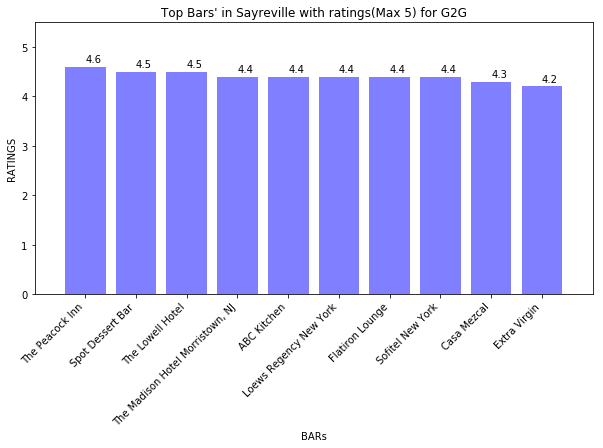

CAMPGROUND


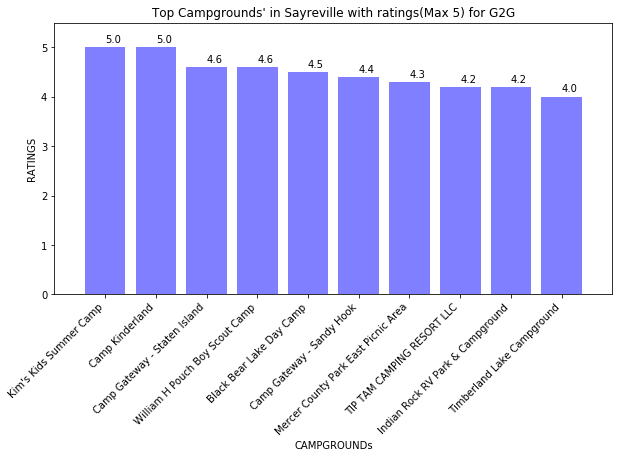

CASINO


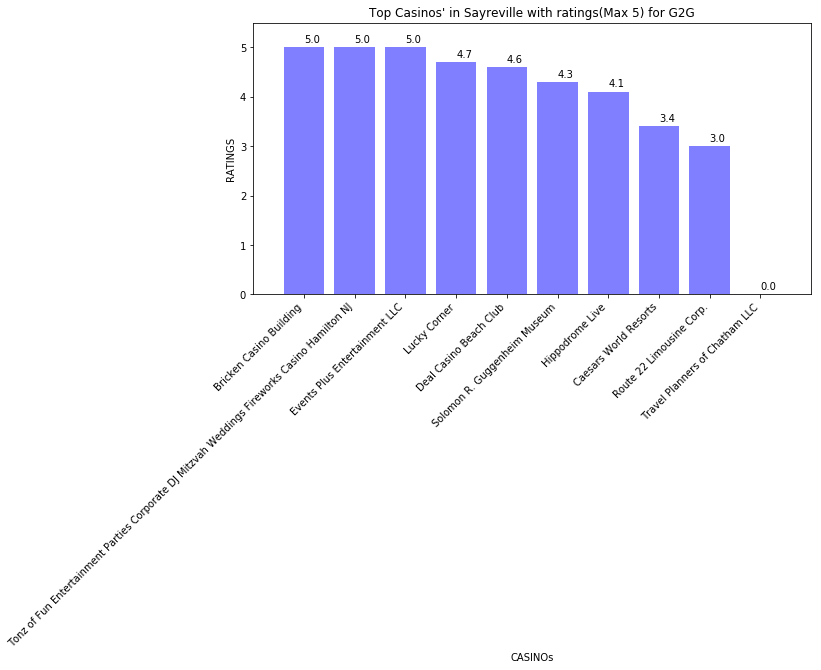

LODGING


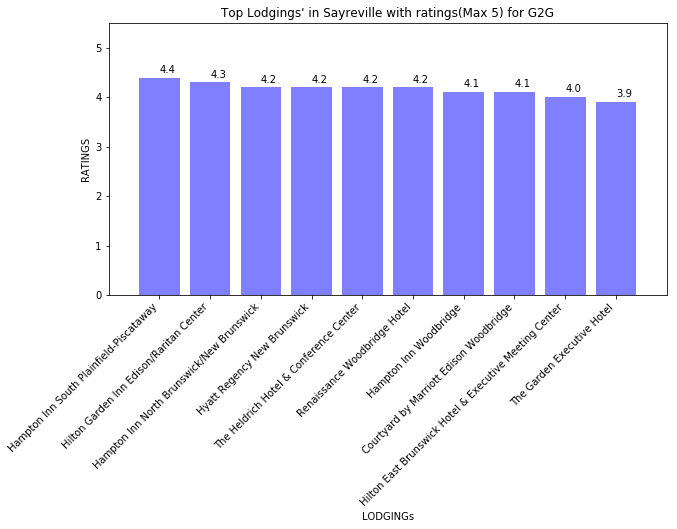

MOVIE_RENTAL


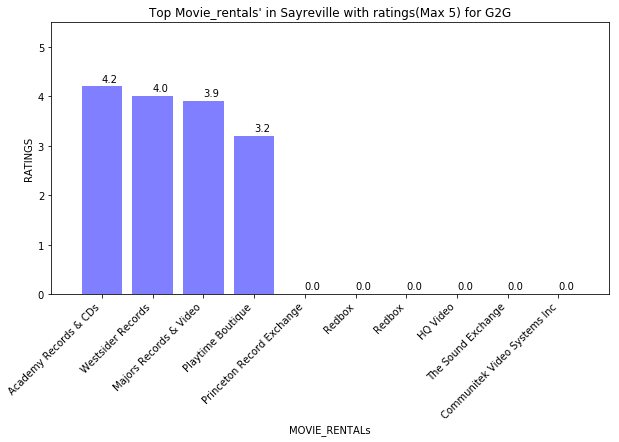

MOVIE_THEATER


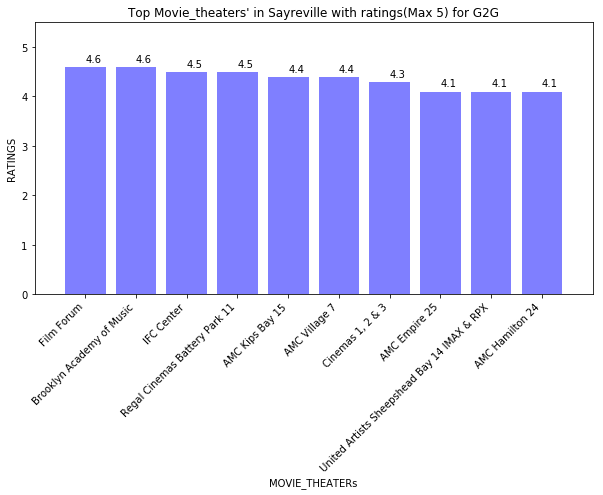

NIGHT_CLUB


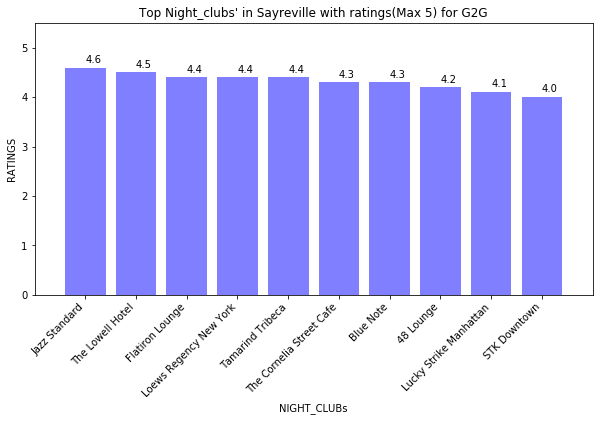

RESTAURANT


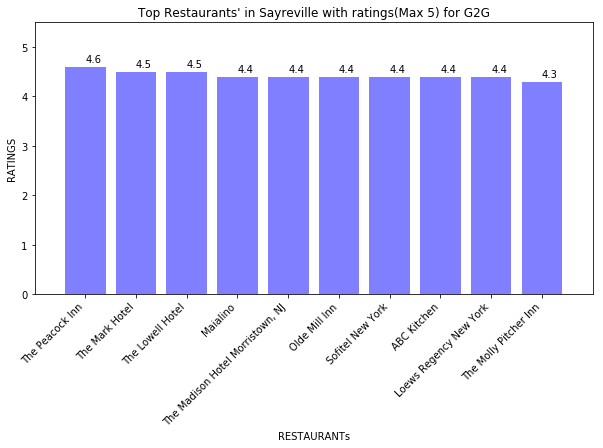

STADIUM


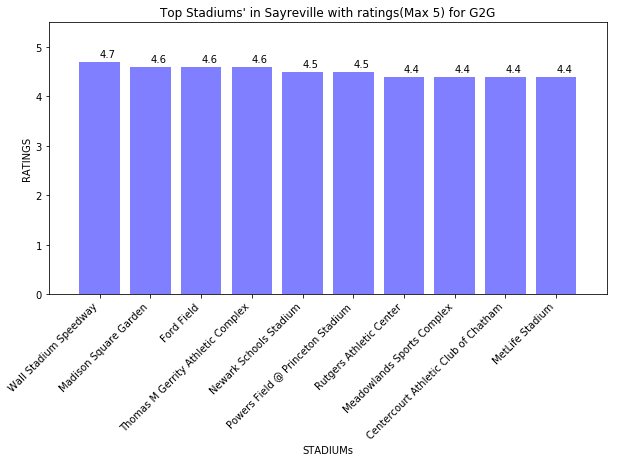

In [133]:
for acty in Acty:
    print(acty.upper())
    Df_A = Df[Df["Type"] == acty]
    if (Df_A["Place"].any() == ""):
            print(f'No {acty} near your place of choice.')
    else:    
        Df_A = Df_A.sort_values(by=["Rating"],ascending=False)
        DF_A = Df_A[Df_A["OpenorClose"]=="Open"]
        Df_A = Df_A[:10]
        x_axis = np.arange(len(Df_A["Place"]))
        plt.figure(figsize = (10,5))
        plt.bar(x_axis, Df_A["Rating"],align="center",color="blue",alpha = 0.5)
        plt.xlim(-1,10)
        plt.ylim(0,5.5)
        plt.xlabel(f'{acty.upper()}s')
        plt.ylabel("Ratings".upper())
        plt.title(f"Top {acty.capitalize()}s' in {City} with ratings(Max 5) for G2G")
        plt.xticks(x_axis, Df_A["Place"],rotation=45,horizontalalignment="right")
        for a,b in zip(x_axis, Df_A["Rating"]):
            plt.text(a, b+.1, str(b))    
        plt.savefig(f'Results/Top_{acty.capitalize()}s_of_{City}_with_Ratings_G2G_Radius_Open.jpg',bbox_inches="tight")
        plt.show()    